In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from sklearn.preprocessing import LabelEncoder
import regex as re
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

In [4]:
train = pd.read_csv("train.csv")

In [5]:
display(train.head(3))

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,TRAIN_000000,USER_00000,BOOK_044368,8,23.0,"sackville, new brunswick, canada",Road Taken,Rona Jaffe,2001.0,Mira
1,TRAIN_000001,USER_00000,BOOK_081205,8,23.0,"sackville, new brunswick, canada",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books
2,TRAIN_000002,USER_00000,BOOK_086781,0,23.0,"sackville, new brunswick, canada",Waverley (Penguin English Library),Walter Scott,1981.0,Penguin Books


In [6]:
# data shape check
train.shape

(871393, 10)

In [7]:
# feature, target split
train_X = train.drop(columns='Book-Rating')
train_y = train[['Book-Rating']]

In [8]:
train_X.isnull().sum()

ID                     0
User-ID                0
Book-ID                0
Age                    0
Location               0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [9]:
age100 = train_X.loc[train_X['Age'] >= 110]
age100['Age'].value_counts()

Age
116.0    968
201.0    285
239.0    116
136.0     97
204.0     93
148.0     51
228.0     48
168.0     40
209.0     20
141.0     17
151.0     17
220.0     15
229.0     11
152.0     10
140.0      8
128.0      8
244.0      7
199.0      6
223.0      5
146.0      4
127.0      4
124.0      4
212.0      2
138.0      2
237.0      2
219.0      2
200.0      2
226.0      1
132.0      1
157.0      1
147.0      1
118.0      1
114.0      1
123.0      1
Name: count, dtype: int64

In [10]:
train_X.sort_values('Year-Of-Publication')

,ID,User-ID,Book-ID,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
132113,TRAIN_132113,USER_14199,BOOK_239005,36.0,"toulouse, haute-garonne, france",Place De Sienne Cote Ombre,Fruttero,-1.0,Points French
527351,TRAIN_527351,USER_55271,BOOK_077800,48.0,"st anne`s, england, united kingdom",State of the Art,Ian Banks,-1.0,Firebird Distributing
759602,TRAIN_759602,USER_79159,BOOK_172466,26.0,"hull, england, united kingdom",Picture of Dorian Gray,Oscar Wilde,-1.0,Penguin Putnam~mass
684757,TRAIN_684757,USER_72031,BOOK_102531,37.0,"woodbridge, virginia, usa",Call of the Wild,Jack London,-1.0,Selldowns/no More Orders
99029,TRAIN_099029,USER_10626,BOOK_081920,36.0,"cleethorpes, england, united kingdom",Getting There,Majula Padmanabhan,-1.0,Pan Books Ltd
...,...,...,...,...,...,...,...,...,...
538564,TRAIN_538564,USER_56365,BOOK_268194,55.0,"drayton valley, alberta, canada",MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEA...,Coville,2021.0,Aladdin
92796,TRAIN_092796,USER_10014,BOOK_268194,39.0,"milwaukee, wisconsin, usa",MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEA...,Coville,2021.0,Aladdin
813430,TRAIN_813430,USER_85242,BOOK_036798,24.0,"portales, ,",Heidi,Johanna Spyri,2021.0,Scholastic
693817,TRAIN_693817,USER_72452,BOOK_268194,52.0,"colorado springs, colorado, usa",MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEA...,Coville,2021.0,Aladdin


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


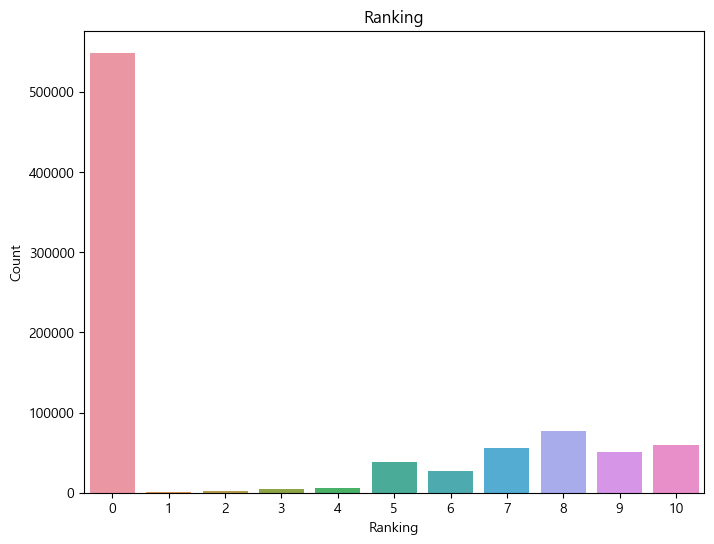

In [11]:
ds = train_y['Book-Rating'].value_counts().reset_index()

ds.columns = ['value', 'count']
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='value', y='count', data=ds, ax=ax)
ax.set_title('Ranking')
ax.set_xlabel('Ranking')
ax.set_ylabel('Count')
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


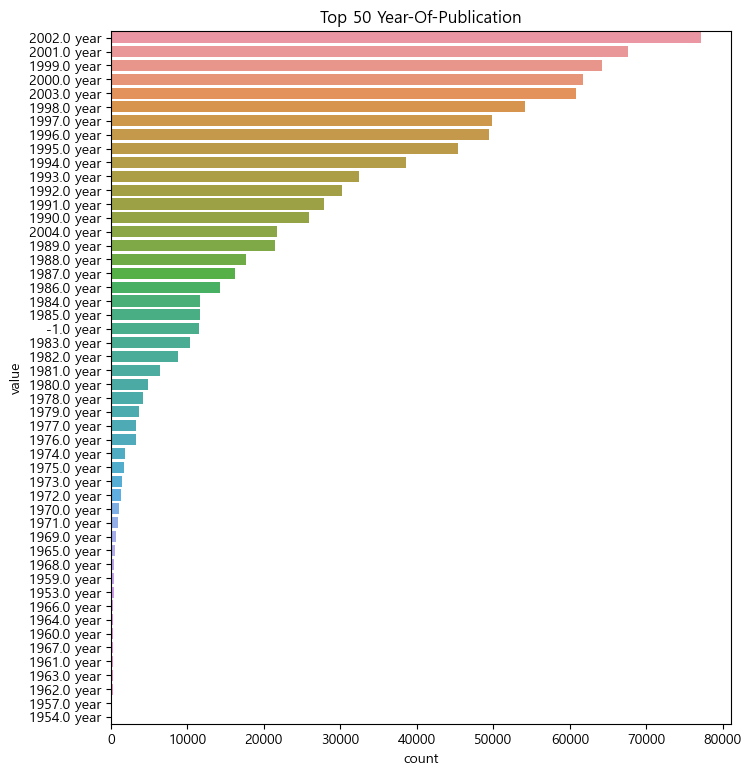

In [12]:
ds = train_X['Year-Of-Publication'].value_counts().reset_index()
ds.columns = ['value', 'count']
ds['value'] = ds['value'].astype(str) + ' year'
ds = ds.sort_values('count', ascending=False).head(50)

plt.figure(figsize=(8, 9))
sns.barplot(data=ds, x='count', y='value', orient='h')
plt.title('Top 50 Year-Of-Publication')
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


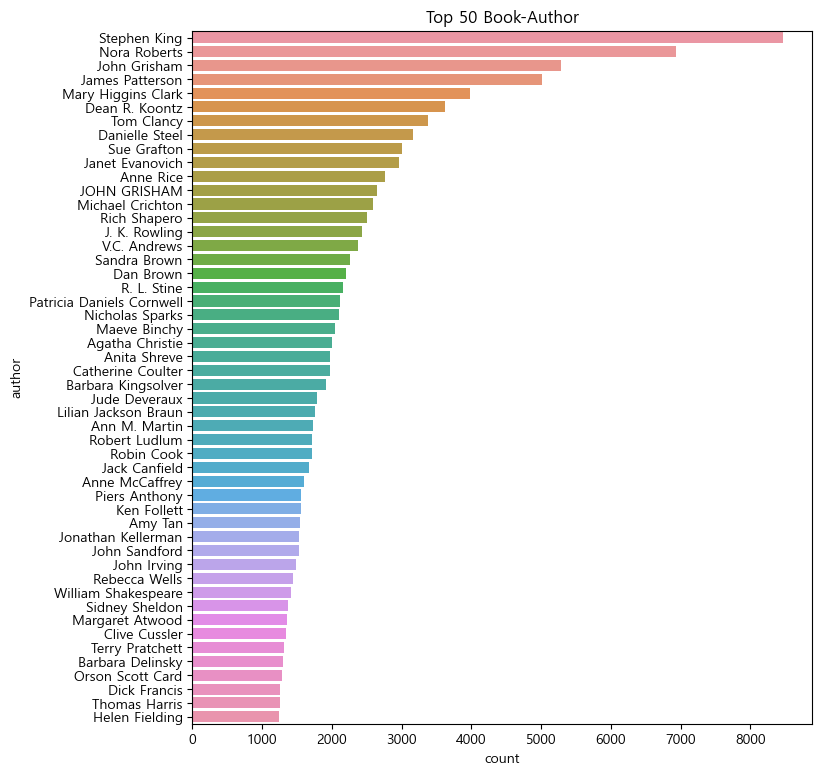

In [13]:
ds = train_X['Book-Author'].value_counts().reset_index()
ds.columns = ['author', 'count']
ds = ds.sort_values('count', ascending=False).head(50)

plt.figure(figsize=(8, 9))
sns.barplot(x='count', y='author', data=ds, orient='h')
plt.title('Top 50 Book-Author')
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


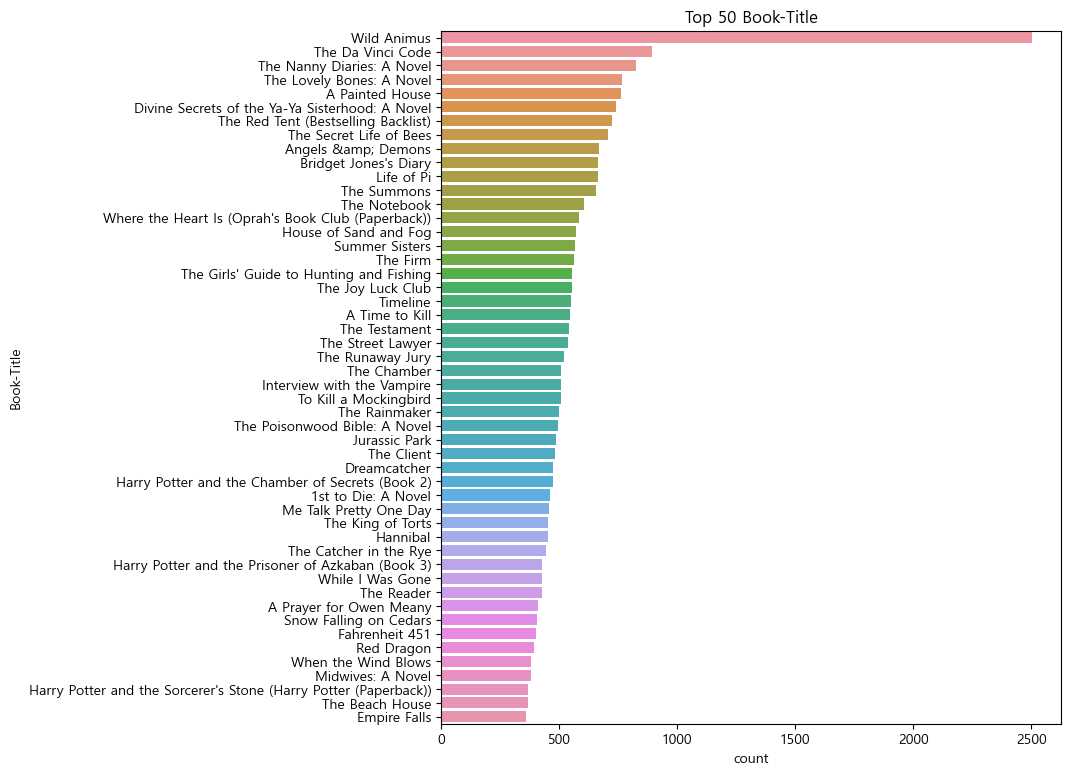

In [14]:
ds = train_X['Book-Title'].value_counts().reset_index()
ds.columns = ['Book-Title', 'count']
ds = ds.sort_values('count', ascending=False).head(50)

plt.figure(figsize=(8, 9))
sns.barplot(data=ds, x='count', y='Book-Title')
plt.title('Top 50 Book-Title')
plt.xlabel('count')
plt.ylabel('Book-Title')
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


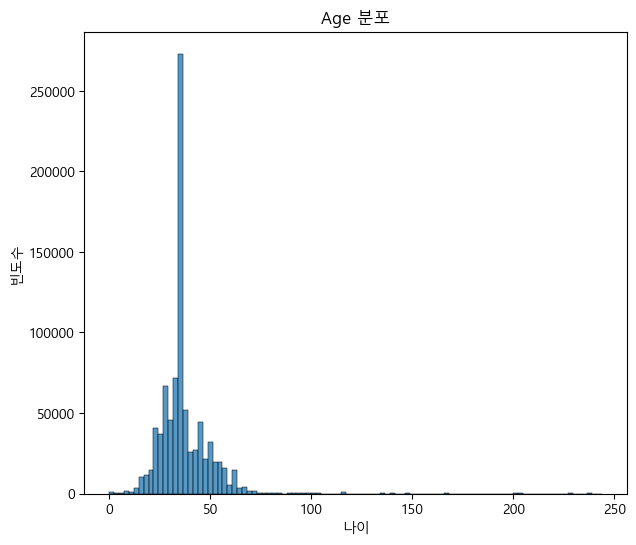

In [15]:
plt.figure(figsize=(7, 6))
sns.histplot(train_X['Age'], bins=100)
plt.title('Age 분포')
plt.xlabel('나이')
plt.ylabel('빈도수')
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


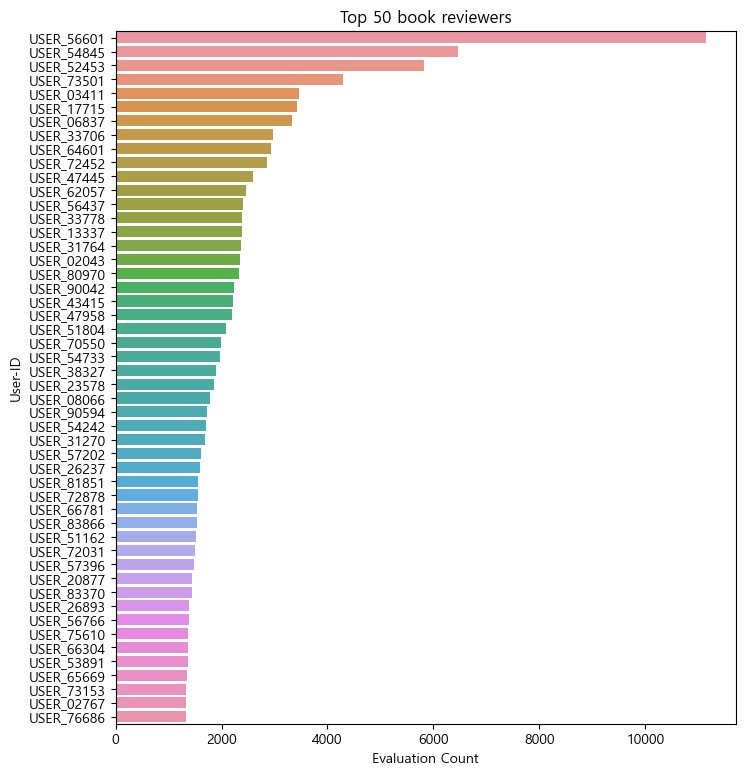

In [16]:
users = train_X['User-ID'].value_counts().reset_index()
users.columns = ['User-ID', 'evaluation_count']
users = users.sort_values('evaluation_count', ascending=False)

plt.figure(figsize=(8, 9))
sns.barplot(x='evaluation_count', y='User-ID', data=users.head(50))
plt.title('Top 50 book reviewers')
plt.xlabel('Evaluation Count')
plt.ylabel('User-ID')
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


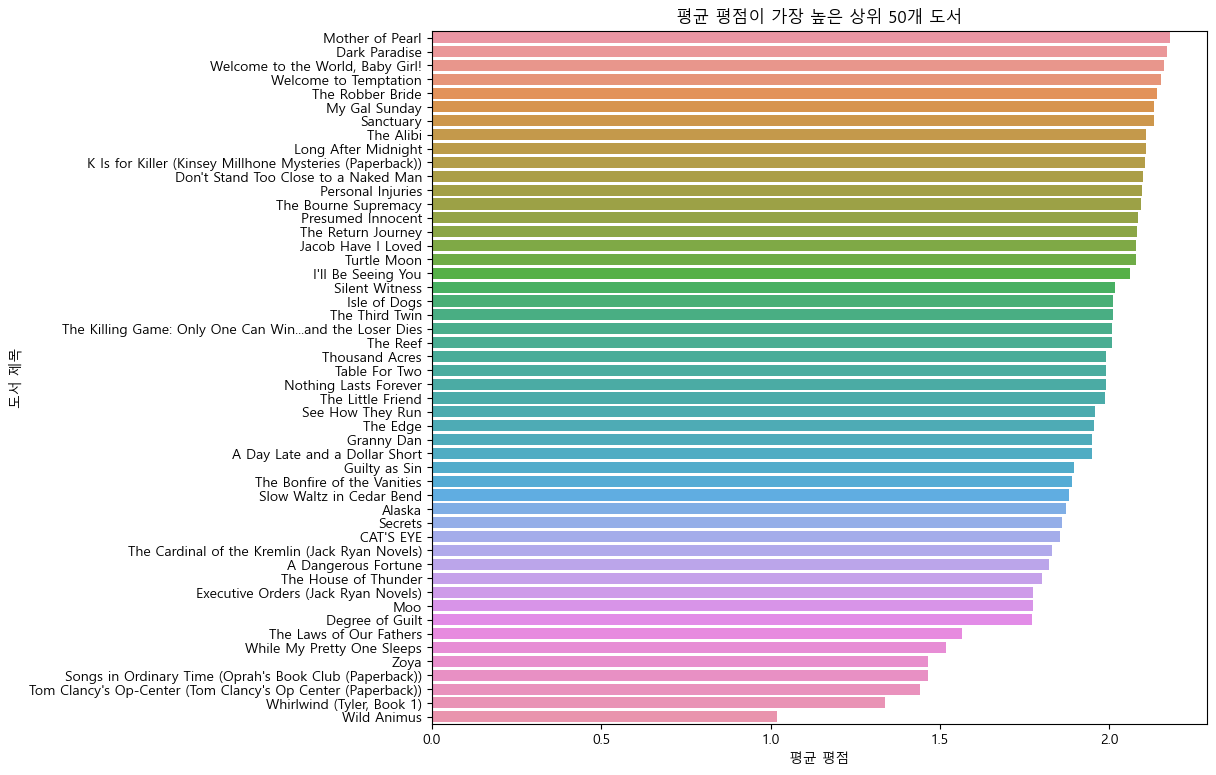

In [17]:
books = train_X['Book-Title'].value_counts().reset_index()
books.columns = ['Book-Title', 'book_evaluation_count']
df = pd.merge(train, books)
mean_df = df[df['book_evaluation_count']>100]
mean_df = mean_df.groupby('Book-Title')['Book-Rating'].mean().reset_index().sort_values('Book-Rating', ascending=False)

plt.figure(figsize=(10, 9))
sns.barplot(data=mean_df.tail(50), x='Book-Rating', y='Book-Title')
plt.title('평균 평점이 가장 높은 상위 50개 도서')
plt.xlabel('평균 평점')
plt.ylabel('도서 제목')
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


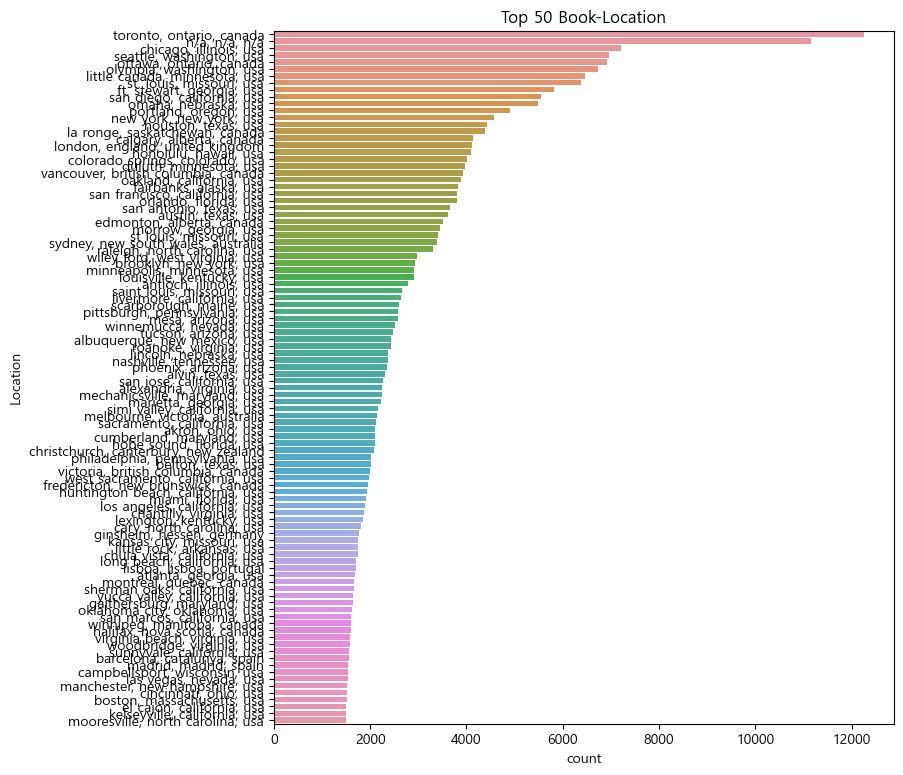

In [18]:
ds = train_X['Location'].value_counts().reset_index()
ds.columns = ['Location', 'count']
ds = ds.sort_values('count', ascending=False).head(100)

plt.figure(figsize=(8, 9))
sns.barplot(x='count', y='Location', data=ds, orient='h')
plt.title('Top 50 Book-Location')
plt.show()

## 전처리 시작

In [19]:
# 문자열 전처리 공통 함수
def text_preprocessing(summary):
    summary = re.sub("[.,\'\"''""!?' ']", "", summary)
    summary = re.sub("[^0-9a-zA-Z\\s]", "", summary)
    summary = summary.lower()
    return summary

In [20]:
# Age ⇒ 연령대 (10대이하, 10대, … , 100대이상) ⇒ 레이블 인코딩
# 연령대 레이블

bins = [-1, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, np.inf]
labels = ['10', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99',  '100']

# train_X, test 데이터에 대해 연령대로 변환
train_X['Age'] = train_X['Age'].astype(float)
train_X['Age'] = pd.cut(train_X['Age'], bins=bins, labels=labels)
# 레이블 인코딩
age_le = LabelEncoder()
age_le.fit(labels)

# train_X, test 데이터에 대해 레이블 인코딩 적용
train_X['Age'] = age_le.transform(train_X['Age'])

C:\Users\chunjae\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\chunjae\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [21]:
# # 연령대 구간 설정
# bins = [-1, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, np.inf]
# labels = ['10', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99',  '100']

# # 'Age' 열의 데이터 타입을 문자열(string)로 변환
# train_X['Age'] = train_X['Age'].astype(str)

# # 'Age' 열의 데이터를 범주(category)로 변환
# train_X['Age'] = pd.Categorical(train_X['Age'], categories=labels)

# # 'Age' 열의 범주를 숫자로 변환 (Label Encoding)
# age_le = LabelEncoder()
# train_X['Age'] = age_le.fit_transform(train_X['Age'])


In [22]:
# Location 전처리 
# Location 전처리 
train_X['country'] = train_X['Location'].apply(lambda x : x.split(',')[-1].strip())
train_X['country'] = train_X['country'].apply(lambda x : text_preprocessing(x))


In [24]:
pd.set_option('display.max_rows', None)
train_X['country'].unique()

array(['canada', 'usa', 'germany', 'spain', 'australia', 'unitedkingdom',
       '', 'italy', 'netherlands', 'portugal', 'sweden', 'austria',
       'france', 'finland', 'newzealand', 'singapore', 'switzerland',
       'philippines', 'espaa', 'malaysia', 'belgium', 'japan', 'denmark',
       'belize', 'england', 'poland', 'ireland', 'haiti',
       'trinidadandtobago', 'deutschland', 'tanzania', 'moldova',
       'bulgaria', 'luxembourg', 'southafrica', 'czechrepublic', 'israel',
       'malta', 'petrolwarnation', 'kuwait', 'peru', 'ecuador',
       'southkorea', 'turkey', 'nigeria', 'brazil', 'hungary',
       'indonesia', 'kazakhstan', 'india', 'china', 'egypt', 'croatia',
       'taiwan', 'argentina', 'chile', 'venezuela', 'galiza', 'iceland',
       'scotland', 'bolivia', 'lithuania', 'norway', 'mexico', 'bahamas',
       'unitedsates', 'romania', 'iran', 'dominicanrepublic', 'maricopa',
       'theworldtomorrow', 'andorra', 'galizaneghra', 'jersey', 'ghana',
       'richmondcountr

In [30]:
country_mapping = {
    'usa': 'unitedstates',
    'us': 'unitedstates',
    'eeuu': 'unitedstats', 
    'usofa' : 'unitedstate',
    'america' : 'unitedstate',
    'unitedsates': 'unitedstates',
    'america': 'unitedstates',
    'england': 'unitedkingdom',
    'unitedkingdon': 'unitedkingdom',
    'unitedkingdonm': 'unitedkingdom',
    'uk': 'unitedkingdom',
    'espa': 'spain',
    'espaa': 'spain',
    'deutschland': 'germany', 
    }